## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [11]:
from keras.datasets import fashion_mnist
import keras
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [4]:
x_train.shape, y_train.shape  #6000 samples of 28*28 images are available

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Find dimensions of an image in the dataset

In [29]:
x_train[0].ndim

3

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [12]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Normalize both the train and test image data from 0-255 to 0-1

In [18]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')    # Images are flattended out into a vector of 784 elements
x_train = x_train.astype('float32')      # Change the data type to float from integer (0 - 255)
x_test = x_test.astype('float32')
x_train /= 255                           # Scale the data between 0 and 1
x_test /= 255

In [19]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [20]:
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [66]:
model1 = Sequential()
# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))
# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

D:\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [67]:
model1.add(MaxPooling2D(pool_size=(2,2)))
# Dropout
model1.add(Dropout(0.25))
# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))
# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [68]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

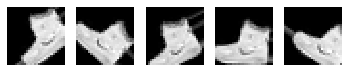

In [69]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [85]:
model1.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
   3/1875 [..............................] - ETA: 1:11 - loss: 2.3034 - accuracy: 0.0729    

D:\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
D:\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 61s 33ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 63s 33ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accura

In [126]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_12 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

###  Report the final train and validation accuracy

In [125]:
loss_and_metrics = model1.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 8s 129us/step
[2.302616335550944, 0.10000000149011612]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [42]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [92]:
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

In [93]:
xTrain.shape,yTrain.shape

((50000, 32, 32, 3), (50000, 1))

In [94]:
xTest.shape, yTest.shape

((10000, 32, 32, 3), (10000, 1))

In [95]:
xTrain

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [96]:
xTrain = xTrain.astype('float32')      # Change the data type to float from integer (0 - 255)
xTest = xTest.astype('float32')
xTrain /= 255                           # Scale the data between 0 and 1
xTest /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [119]:
def data_gen(fc,sc,fsn,ssn,Zw,Rot,wtshift,htshift,hflip,vflip):  #Created data_gen function 
datagen1 = ImageDataGenerator(
    featurewise_center=fc,  # set input mean to 0 over the dataset
    samplewise_center=sc,  # set each sample mean to 0
    featurewise_std_normalization=fsn,  # divide inputs by std of the dataset
    samplewise_std_normalization=ssn,  # divide each input by its std
    zca_whitening=Zw,  # apply ZCA whitening
    rotation_range=Rot,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=wtshift,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=htshift,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=hflip,  # randomly flip images
    vertical_flip=vflip   
    )  
    return datagen1
)

In [132]:
datagen1 = data_gen(True,True,False,False,True,90,0.50,0.50,True,False)

### **Prepare/fit the generator.**

In [133]:
datagen1.fit(xTrain)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

[]

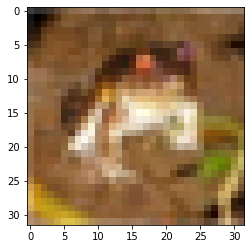

In [134]:
plt.imshow(xTrain[0].squeeze(), cmap='gray')
plt.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


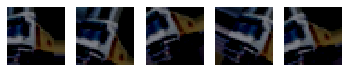

In [135]:
gen = datagen1.flow(xTrain[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


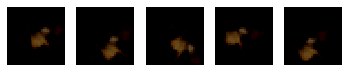

In [137]:
gen = datagen1.flow(xTrain[3:4], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())  #without cmap
    plt.plot()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


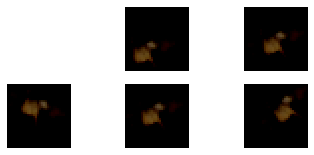

In [138]:
gen = datagen1.flow(xTrain[3:4], batch_size=1)
for i in range(1, 6):
    plt.subplot(330+1+i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(),cmap='gray')  #without cmap
    plt.plot()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


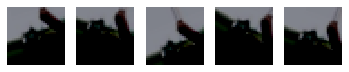

In [139]:
gen = datagen1.flow(xTrain[2:3], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(),cmap='gray')  #without cmap
    plt.plot()
plt.show()